#### Import Libraries

source: https://towardsdatascience.com/understanding-word2vec-embedding-in-practice-3e9b8985953

In [1]:
import re, string 
import sys
import os
import codecs
import pandas as pd   
from collections import defaultdict
import spacy
import gensim
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from gensim.models import Word2Vec
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp.max_length = 6000000 #spaCy cannot process more than 1 million characters at once. Therefore nlp.max.length has to be changed as per the length of the text fed into the spaCy library functions

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GoyaNipu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Creating copy of list of stopwords using NLTK
Here, we can either extend or shorten the list of stop words

In [2]:
STOPWORDS = set(stopwords.words('english'))

In [64]:
print(STOPWORDS)

{'aren', 'each', 'how', 'should', 'which', 'an', 'most', 'our', 'or', 'had', 'with', 'this', "hasn't", 'yourself', 'be', 'here', 'them', 'own', "mightn't", 'when', 'just', 'isn', "that'll", "you're", "weren't", 'up', 'between', 'their', 'other', 'his', 'a', 'against', 'being', 'are', 'before', 'the', "hadn't", 'down', 'then', 'can', "haven't", "wouldn't", 'where', 'your', 'wasn', 'themselves', 'once', "should've", 'hadn', 'on', 'we', 'you', 'there', 'm', 'were', 'will', 'but', 'so', "isn't", 'under', 'than', 'to', 'ma', 'until', 'whom', 'for', 'again', "wasn't", 'do', 'those', 'nor', 'during', 'as', 'did', 'don', "you'll", 'is', 'who', 'further', 's', 'll', "don't", "mustn't", 'from', 'doing', 't', 'over', 'ourselves', 'and', 'some', 'o', "won't", 'of', 'myself', 'why', "needn't", 'they', 'having', 'after', 'such', 'mightn', 'mustn', 'below', 'at', 'very', "doesn't", 'her', 'ain', 'yours', 'him', 'have', "couldn't", 'itself', 'now', 'i', 'himself', 'out', 'shouldn', 'in', 'above', 'if'

In [3]:
nlp = en_core_web_sm.load(disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#### Text Pre-processing Function

In [4]:
def clean_text(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

#### Lemmatization Function

In [5]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

#### Reading text files from the directory and applying the text-processing function over the corpus of text

In [6]:
list_documents = []
file_names = []
files = os.listdir("G:/Post Construction/PDF_text") #directory path where ESAs as text files are saved
for file in files:
    if file.endswith('.txt'):
        with codecs.open("G:/Post Construction/PDF_text/" + file,'r', encoding='utf-8-sig') as corpus: #directory path where ESAs as text files are saved
            file_names.append(file)
            input_str = corpus.read()
            input_str = clean_text(input_str)
            #input_str = lemmatizer(input_str)
            #input_str = input_str.replace('-PRON-', '')
            list_documents.append(input_str)

In [7]:
'''sentences = [lst_elmnt.split() for lst_elmnt in list_documents]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
        
sorted(word_freq, key=word_freq.get, reverse=True)[:20]'''

'sentences = [lst_elmnt.split() for lst_elmnt in list_documents]\nword_freq = defaultdict(int)\nfor sent in sentences:\n    for i in sent:\n        word_freq[i] += 1\n        \nsorted(word_freq, key=word_freq.get, reverse=True)[:20]'

#### Further processing of text and converting tokens

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

word_tokens = list(sent_to_words(list_documents))

#### converting tokens to bigrams and trigrams

In [40]:
# First of all, we will build the bigram and trigram model
bigram = gensim.models.Phrases(word_tokens, min_count = 20, threshold = 16) # higher threshold means fewer phrases.
trigram = gensim.models.Phrases(bigram[word_tokens], threshold = 16)

#min_count: ignore all words and bigrams with total collected count lower than this
#threshold represents a score threshold for forming the phrases (higher means fewer phrases). A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold

# Faster way to get a sentence clubbed as a trigram/bigram 
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(bigram_mod[word_tokens[0]]) # this will print unigrams, bigrams as well as trigrams. Bigrams are two words frequently occuring together in the documents and trigram is three words frequently occuring together.

['street_sw', 'calgary_alberta', 'canada', 'tel_fax', 'email', 'december', 'filed_electronically', 'national_energy', 'board_seventh', 'avenue', 'sw_calgary', 'alberta_attention', 'ms_sheri', 'young_secretary', 'board_dear', 'ms_young', 'nova_gas', 'transmission_ltd', 'ngtl', 'watino_crossover', 'calais_extension', 'project', 'board', 'order', 'order', 'post', 'construction', 'environmental', 'monitoring', 'report', 'neb_file', 'please_find', 'enclosed', 'second', 'final', 'year', 'monitoring', 'program', 'report', 'watino_crossover', 'calais_extension', 'project', 'filing', 'report', 'condition', 'approval', 'order', 'commitment', 'ngtl', 'file_board', 'first', 'second', 'complete_growing', 'seasons', 'post', 'construction', 'monitoring', 'program', 'report', 'first', 'report', 'provided', 'board', 'february', 'neb', 'filing', 'id', 'board', 'require', 'additional', 'information_respect', 'filing_please', 'contact_undersigned', 'email_truly', 'nova_gas', 'transmission_ltd', 'original_

#### Function for making bigrams

In [41]:
def make_bigrams(tokens):
    return [bigram_mod[doc] for doc in tokens]

#### Function for making Trigrams

In [42]:
def make_trigrams(tokens):
    return [trigram_mod[bigram_mod[doc]] for doc in tokens]

#### Applying bigram function over the text corpus

In [43]:
#sentences = make_bigrams(word_tokens)
sentences = make_trigrams(word_tokens)
print(type(sentences))

<class 'list'>


In [44]:
w2v_model = Word2Vec(min_count = 45,
                     window = 10,
                     size = 100,
                     workers = 2)

#### Explanation of issue with running .build_vocab more than once
In general, triggering build_vocab() more than once, without the (un my opinion experimental/sketchy) update parameter, isn't a supported/well-defined operation. The best it could do (and what I believe it used to do) is completely clobber the existing vocabulary & model state – essentially starting a new model. Now, it appears it will trigger this error, because of the sanity-check on the sort.

The error message is poorly worded, implying taking an extra step (sorting earlier) might fix the issue. Instead, it's the sort-attempt that's failing. So perhaps the message should be: "cannot sort vocabulary after model weights already initialized".
Source: https://github.com/RaRe-Technologies/gensim/issues/1187

In [45]:
w2v_model.build_vocab(sentences) # if this throws error, then try the below code with update parameter
#w2v_model.build_vocab(sentences, update = True)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


#### Similarity measures between the root word and context words is based on cosine similarity

In [46]:
w2v_model.wv.most_similar(positive=['coarse_fragment'])

KeyError: "word 'coarse_fragment' not in vocabulary"

In [47]:
w2v_model.wv.most_similar(positive=['subsidence'])

[('hydrovac_holes', 0.6944445371627808),
 ('minor', 0.6663646101951599),
 ('erosion_rills', 0.6512567400932312),
 ('contouring', 0.6043906211853027),
 ('rills', 0.591826319694519),
 ('rill', 0.5913306474685669),
 ('inhibiting_recovery', 0.5749703645706177),
 ('rill_erosion', 0.5749148726463318),
 ('affecting_land_use', 0.5727267861366272),
 ('approximately_cm_deep', 0.5671827793121338)]

In [48]:
vec_lst = ['physical','physical_environment', 'soil', 'soil_productivity', 'vegetation', 'water', 'water_quantity', 'water_quality', 'fish', 'fish_habitat', 'wetlands', 'wildlife', 'wildlife_habitat', 'species', 'species_risk']
sub_cat_vec_lst = ['erosion', 'coarse_fragments', 'subsidence', 'topsoil_admixing', 'compaction', 'topsoil_loss', 'watercourse', 'vegetation_re-establishment', 'invasive', 'plants', 'rare', 'stream', 'stream_channel', 'stream_channel_profile', 'stream_bank', 'stream_bank_stability', 'riparian', 'riparian_vegetation','riparian_vegetation_reestablishment', 'access', 'access_control']

In [49]:
vec_sub_cat = []
vec_lst.extend(sub_cat_vec_lst)
vec_sub_cat.extend(vec_lst)

In [50]:
root_word_dict = {}
for root_word in vec_sub_cat:
    try:
        context_words = w2v_model.wv.most_similar(positive = [root_word],topn = 15)
        root_word_dict[root_word] = context_words
    except:
        root_word_dict[root_word] = 'The word is not in vocabulary'

In [51]:
# Convert the dictionary to dataframe
word2vec_df = pd.DataFrame.from_dict(root_word_dict)

In [52]:
word2vec_df.to_csv(r'G:\Post Construction\word2vec_trigram.csv', encoding = 'utf-8-sig')

In [53]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


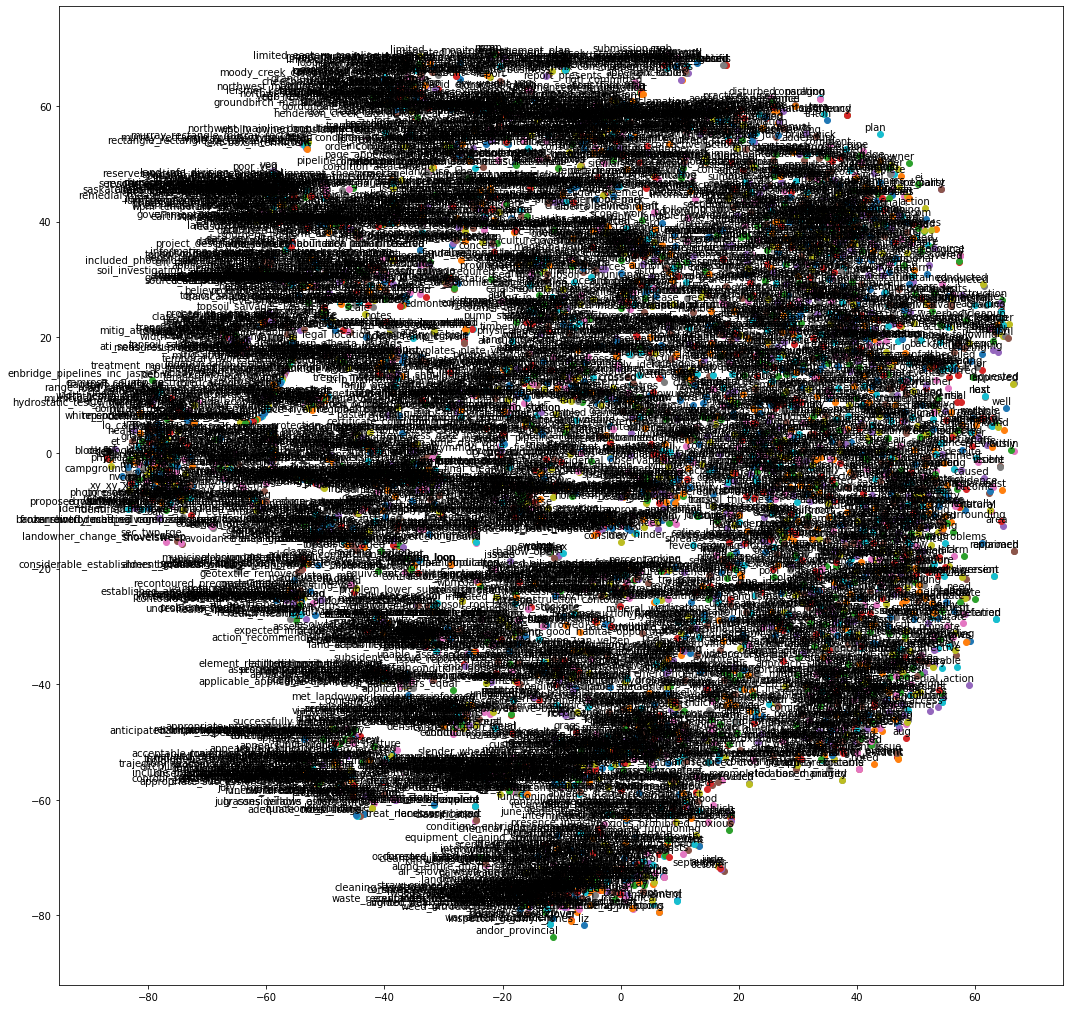

In [54]:
tsne_plot(w2v_model)

### Method 2
source: https://towardsdatascience.com/word2vec-for-phrases-learning-embeddings-for-more-than-one-word-727b6cf723cf

In [61]:
def clean_sentence(sentence):
    sentence = sentence.lower().strip() ##trimming leading and trailing spaces, lower case
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence) #remove punctuation, remove unnecessary characters and reduce duplicate space into a single space 
    return re.sub(r'\s{2,}', ' ', sentence)

In [62]:
from spacy.lang.en.stop_words import STOP_WORDS

In [63]:
print(STOP_WORDS)

{'should', 'most', 'or', 'everyone', 'last', 'whenever', 'them', 'herein', 'just', 'between', 'became', 'many', 'besides', 'then', 'three', 'fifty', 'themselves', 'becomes', 'we', '’s', 'under', 'across', 'for', 'using', 'hereafter', 'those', 'used', 'hereby', 'is', 'further', 'otherwise', 'ten', 'one', 'ca', 'give', 'perhaps', 'over', 'sixty', 'whither', 'mine', 'and', 'of', 'meanwhile', 'they', 'after', 'may', 'unless', 'her', 'yours', 'yet', '’m', 'itself', 'anything', 'could', 'i', 'whatever', 'others', 'in', 'if', 'no', 'whereby', 'someone', 'yourselves', 'toward', 'my', 'while', 'hundred', 'already', 'does', 'he', 'part', 'really', 'see', 'herself', 'thence', 'off', 'sometimes', 'ours', 'five', 'same', 'into', '‘d', "'ve", 'two', 'how', 'which', 'everything', 'our', '’re', 'beyond', 'had', 'twelve', 'well', '‘re', 'yourself', 'whose', 'thru', 'various', 'their', 'against', 'rather', 'formerly', 'done', 'your', 'will', 'so', 'take', 'towards', 'get', 'call', 'did', 'moreover', 'up

In [84]:
list_documents = []
file_names = []
files = os.listdir("G:/Post Construction/PDF_text") #directory path where ESAs as text files are saved
for file in files:
    if file.endswith('.txt'):
        with codecs.open("G:/Post Construction/PDF_text/" + file,'r', encoding='utf-8-sig') as corpus: #directory path where ESAs as text files are saved
            file_names.append(file)
            input_str = corpus.read()
            cleaned_str = clean_sentence(input_str)
            #input_str = lemmatizer(input_str)
            #input_str = input_str.replace('-PRON-', '')
            list_documents.append(cleaned_str)

In [86]:
def tokenize(sentence):
    return [token.split() for token in sentence if token not in STOP_WORDS]
word_tokens = list(tokenize(list_documents))

In [107]:
bigram_phrases_model = Phrases(word_tokens,
                      min_count=20,
                      threshold = 1,
                      progress_per=1000, scoring = 'npmi')
bigram_mod = gensim.models.phrases.Phraser(bigram_phrases_model)

In [108]:
def make_bigrams(tokens):
    return [bigram_mod[doc] for doc in tokens]

In [109]:
sentences = make_bigrams(word_tokens)
#sentences = make_trigrams(word_tokens)
print(sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [110]:
w2v_model_version2 = Word2Vec(min_count = 45,
                     window = 10,
                     size = 300,
                     workers = 2, alpha = 0.01, sg = 1, negative = 5)

In [111]:
w2v_model_version2.build_vocab(sentences) # if this throws error, then try the below code with update parameter
#w2v_model.build_vocab(sentences, update = True)
w2v_model_version2.train(sentences, total_examples=w2v_model_version2.corpus_count, epochs = w2v_model_version2.iter)
w2v_model_version2.init_sims(replace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
vec_lst = ['physical','physical_environment', 'soil', 'soil_productivity', 'vegetation', 'water', 'water_quantity', 'water_quality', 'fish', 'fish_habitat', 'wetlands', 'wildlife', 'wildlife_habitat', 'species', 'species_risk']
sub_cat_vec_lst = ['erosion', 'coarse_fragments', 'subsidence', 'topsoil_admixing', 'compaction', 'topsoil_loss', 'watercourse', 'vegetation_re-establishment', 'invasive', 'plants', 'rare', 'stream', 'stream_channel', 'stream_channel_profile', 'stream_bank', 'stream_bank_stability', 'riparian', 'riparian_vegetation','riparian_vegetation_reestablishment', 'access', 'access_control']

In [113]:
vec_sub_cat = []
vec_lst.extend(sub_cat_vec_lst)
vec_sub_cat.extend(vec_lst)

In [114]:
root_word_dict = {}
for root_word in vec_sub_cat:
    try:
        context_words = w2v_model_version2.wv.most_similar(positive = [root_word],topn = 15)
        root_word_dict[root_word] = context_words
    except:
        root_word_dict[root_word] = 'The word is not in vocabulary'

In [115]:
# Convert the dictionary to dataframe
word2vec_df = pd.DataFrame.from_dict(root_word_dict)

In [116]:
word2vec_df.to_csv(r'G:\Post Construction\word2vec_bigramv2.csv', encoding = 'utf-8-sig')